### Surface Code Experiments

In [72]:
import numpy as np
import stim
import pymatching
import matplotlib.pyplot as plt

In [165]:
# Define experiments with variable error rates, rounds, and distance

def surface_experiments(error_rate, rounds, distance, shots=1000):
    circuit = stim.Circuit.generated("surface_code:rotated_memory_x", 
                                     distance=distance, 
                                     rounds=rounds, 
                                     after_clifford_depolarization=error_rate,
                                     after_reset_flip_probability=error_rate,
                                     before_measure_flip_probability=error_rate,
                                     before_round_data_depolarization=error_rate)
    model = circuit.detector_error_model(decompose_errors=True)
    matching = pymatching.Matching.from_detector_error_model(model)
    sampler = circuit.compile_detector_sampler()
    syndrome, actual_observables = sampler.sample(shots=shots, separate_observables=True)
    num_errors = 0
    for i in range(syndrome.shape[0]):
        predicted_observables = matching.decode(syndrome[i, :])
        num_errors += not np.array_equal(actual_observables[i, :], predicted_observables)
    return num_errors

In [151]:
# Run experiments

data = []
for d in [3, 6, 9]:
    sub_data = []
    for p in np.logspace(-5, -1.5, 500):
        sub_data.append(surface_experiments(p, 10, d))
    data.append(sub_data)

Text(0.5, 1.0, 'Surface code error rate vs number of errors')

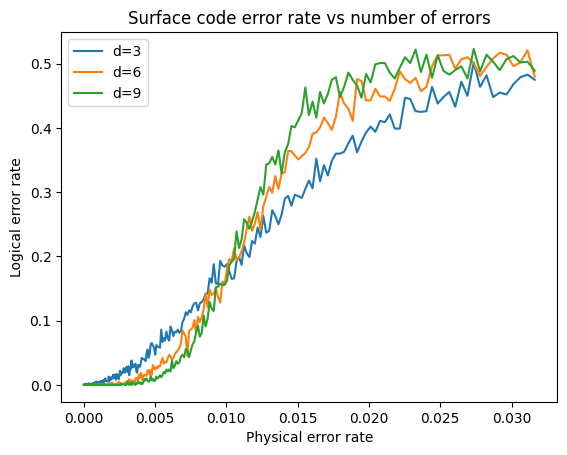

In [153]:
# Plot results

plt.plot(np.logspace(-5, -1.5, 500), np.array(data[0])/1000)
plt.plot(np.logspace(-5, -1.5, 500), np.array(data[1])/1000)
plt.plot(np.logspace(-5, -1.5, 500), np.array(data[2])/1000)

plt.legend(["d=3", "d=6", "d=9"])
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.title("Surface code error rate vs number of errors")

0.0


Text(0.5, 1.0, 'Surface code error rate vs number of errors')

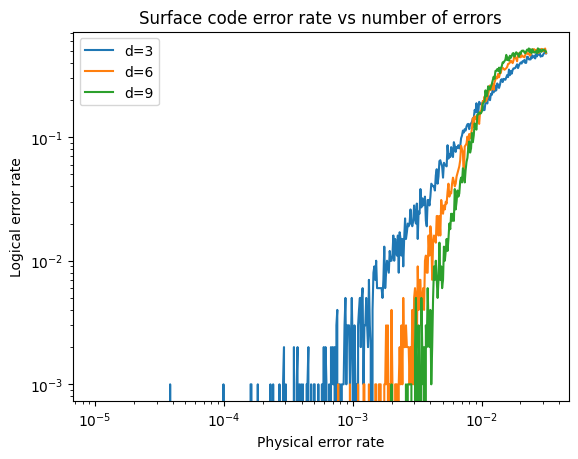

In [163]:
# Plot results
plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[0])/1000)
plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[1])/1000)
plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[2])/1000)

print(np.min(np.array([data])/1000))

# plt.yscale('log')
plt.legend(["d=3", "d=6", "d=9"])
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.title("Surface code error rate vs number of errors")

In [166]:
# Run experiments with more shots

data_shots = []
for d in [3, 6, 9]:
    sub_data_shots = []
    for p in np.logspace(-5, -1.5, 500):
        sub_data_shots.append(surface_experiments(p, 10, d, shots=10000))
    data_shots.append(sub_data_shots)

Text(0.5, 1.0, 'Surface code error rate vs number of errors')

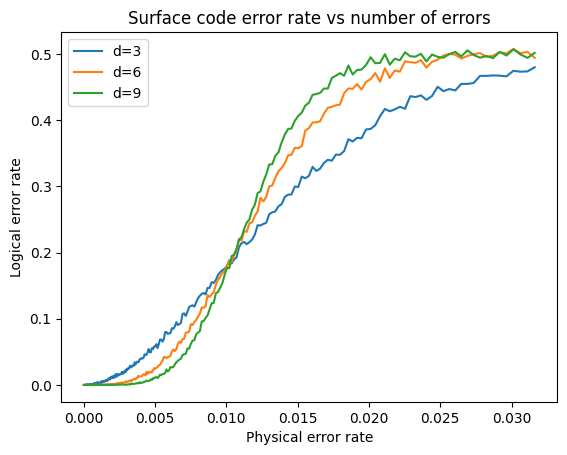

In [170]:
# Plot results with more shots

plt.plot(np.logspace(-5, -1.5, 500), np.array(data_shots[0])/10000)
plt.plot(np.logspace(-5, -1.5, 500), np.array(data_shots[1])/10000)
plt.plot(np.logspace(-5, -1.5, 500), np.array(data_shots[2])/10000)

plt.legend(["d=3", "d=6", "d=9"])
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.title("Surface code error rate vs number of errors")

0.0


Text(0.5, 1.0, 'Surface code error rate vs number of errors')

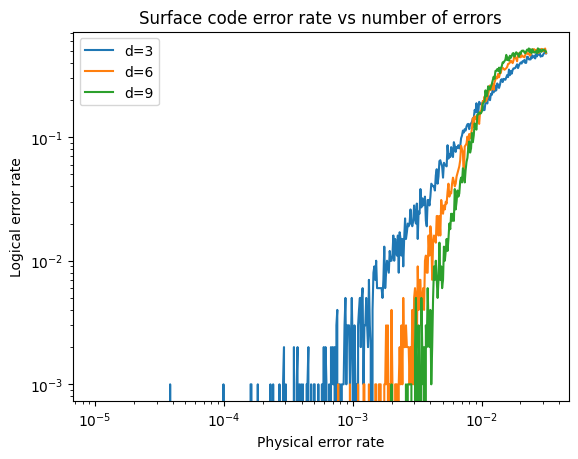

In [169]:
# Plot results with more shots

plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[0])/1000)
plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[1])/1000)
plt.loglog(np.logspace(-5, -1.5, 500), np.array(data[2])/1000)

print(np.min(np.array([data])/1000))

# plt.yscale('log')
plt.legend(["d=3", "d=6", "d=9"])
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.title("Surface code error rate vs number of errors")